

## Creep Life Prediction

Statistics for LMP:

Minimum LMP: 26,269.81
Maximum LMP: 39,512.10
Mean LMP: 34,276.85
Median LMP 34,511.45
Standard deviation of LMP: 2,330.80
Statistics for life:

Minimum life: 0.60
Maximum life: 192,607.00
Mean life: 7,363.24
Median life 1,211.00
Standard deviation of life: 16,690.66
Total number of records: 2066


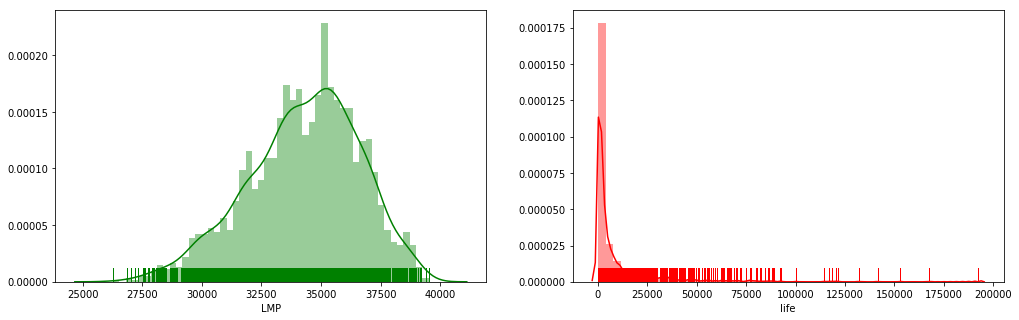

In [60]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns


# Import supplementary visualizations code visuals.py
#import visuals2 as vs

# Pretty display for notebooks
%matplotlib inline

# Load the creep dataset


data = pd.read_csv('creep_5.csv')
LMP = data['LMP']
life = data['life']
CR_N = data['CR_N']
features_raw = data.drop('LMP', axis = 1)
features_T = features_raw.drop('life',axis = 1)

#remove cooling rate
#features_T = features_T.drop('CR_N',axis = 1)
features = features_T.drop('Temperature',axis = 1)
#features = data.drop('Life', axis = 1)
#features_group1 = data.ix[:,'Temperature':'Stress']
#features_group2 = data.ix[:,'C':'W']
#features_group3 = data.ix[:,'Ni':'O']
#features_group4 = data.ix[:,'N_T':'T_Time']
#features_group5 = data.ix[:,'CC':'L']


#Minimum LMP of the data
minimum_LMP = np.min(LMP)

#Maximum life of the data
maximum_LMP = np.max(LMP)

# Mean life of the data
mean_LMP = np.mean(LMP)

# Median life of the data
median_LMP = np.median(LMP)

# Standard deviation of life of the data
std_LMP = np.std(LMP)

# Show the calculated statistics
print "Statistics for LMP:\n"
print "Minimum LMP: {:,.2f}".format(minimum_LMP)
print "Maximum LMP: {:,.2f}".format(maximum_LMP)
print "Mean LMP: {:,.2f}".format(mean_LMP)
print "Median LMP {:,.2f}".format(median_LMP)
print "Standard deviation of LMP: {:,.2f}".format(std_LMP)



#Minimum LMP of the data
minimum_life = np.min(life)

#Maximum life of the data
maximum_life = np.max(life)

# Mean life of the data
mean_life = np.mean(life)

# Median life of the data
median_life = np.median(life)

# Standard deviation of life of the data
std_life = np.std(life)

# Show the calculated statistics
print "Statistics for life:\n"
print "Minimum life: {:,.2f}".format(minimum_life)
print "Maximum life: {:,.2f}".format(maximum_life)
print "Mean life: {:,.2f}".format(mean_life)
print "Median life {:,.2f}".format(median_life)
print "Standard deviation of life: {:,.2f}".format(std_life)


#Total number of records
n_records = len(data)


# Print the results
print "Total number of records: {}".format(n_records)

# histogram of LMP
plt.figure(figsize=(17, 5))
plt.subplot(121)
sns.distplot(LMP, bins=50, rug=True, color='green')
plt.subplot(122)
sns.distplot(life, bins=50, rug=True, color='red')
# Scatter Plots of all features
#pd.scatter_matrix(features, alpha = 0.3, figsize = (70,40), diagonal = 'kde');

(array([  136.,     0.,     0.,  1150.,     0.,     0.,   529.,     0.,
            0.,   251.]),
 array([  1.00000000e-05,   3.00009000e-01,   6.00008000e-01,
          9.00007000e-01,   1.20000600e+00,   1.50000500e+00,
          1.80000400e+00,   2.10000300e+00,   2.40000200e+00,
          2.70000100e+00,   3.00000000e+00]),
 <a list of 10 Patch objects>)

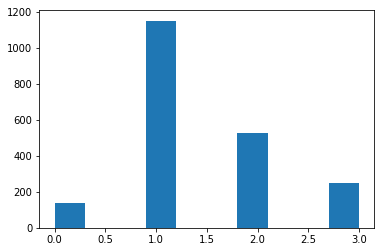

In [72]:
plt.hist(CR_N)

In [65]:
indices = [123,1260,1460]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(features.loc[indices], columns = features.keys()).reset_index(drop = True)
display(samples.head(n = 5))

,Stress,C,Si,Mn,P,S,Cr,Mo,W,Ni,...,V,Nb,N,Al,O,N_T,N_Time,CR_N,T_T,T_Time
0,41,0.140,0.250,0.55,0.010,0.0090,2.44,1.03,0.01,0.180,...,0.010,0.005,0.0102,0.018,0.01,1203,6.0,3.0,908,6.0
1,120,0.099,0.385,0.42,0.017,0.0041,8.75,0.96,0.03,0.128,...,0.204,0.070,0.0580,0.024,0.01,1323,1.0,1.0,1003,1.0
2,229,0.088,0.060,0.45,0.005,0.0020,9.01,0.50,1.77,0.100,...,0.200,0.050,0.0480,0.008,0.01,1323,1.0,1.0,1053,1.0


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  # This is added back by InteractiveShellApp.init_path()


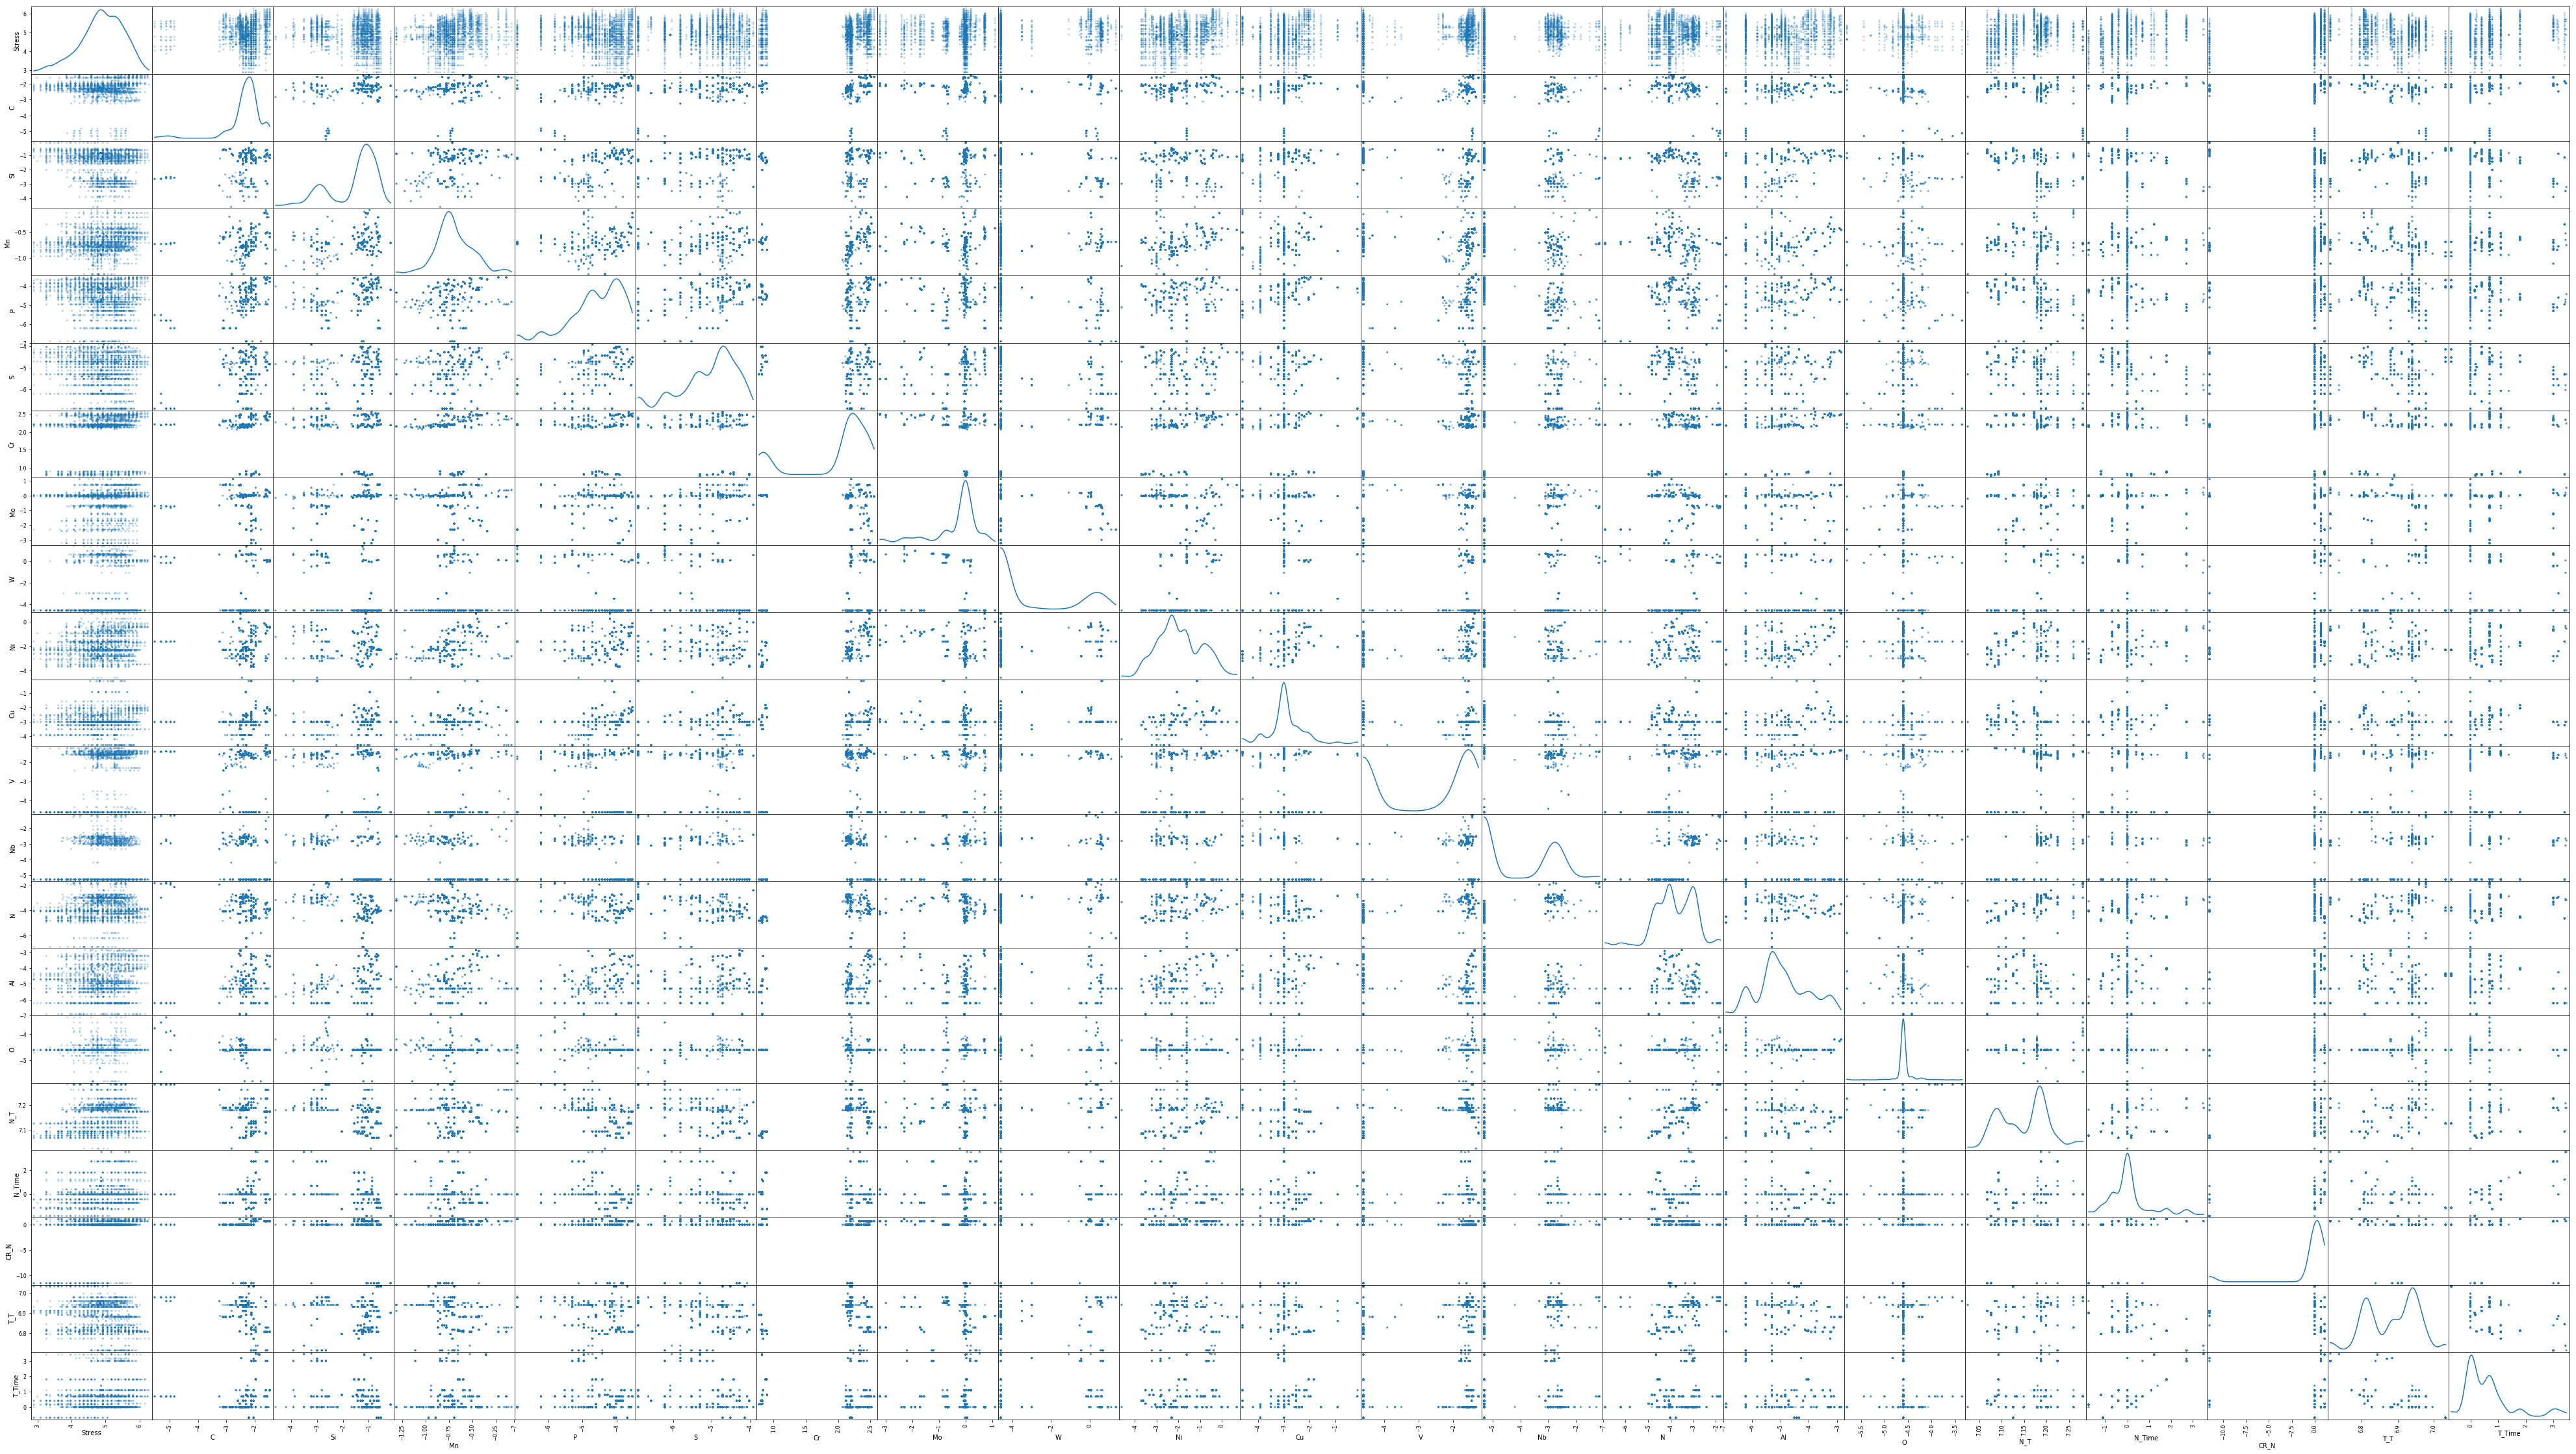

In [69]:
# Scale the data using the natural logarithm
log_features = np.log(features)

log_features_T = np.log(features_T)

log_life = np.log(life)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)
# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_features, alpha = 0.3, figsize = (70,40), diagonal = 'kde');

In [67]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


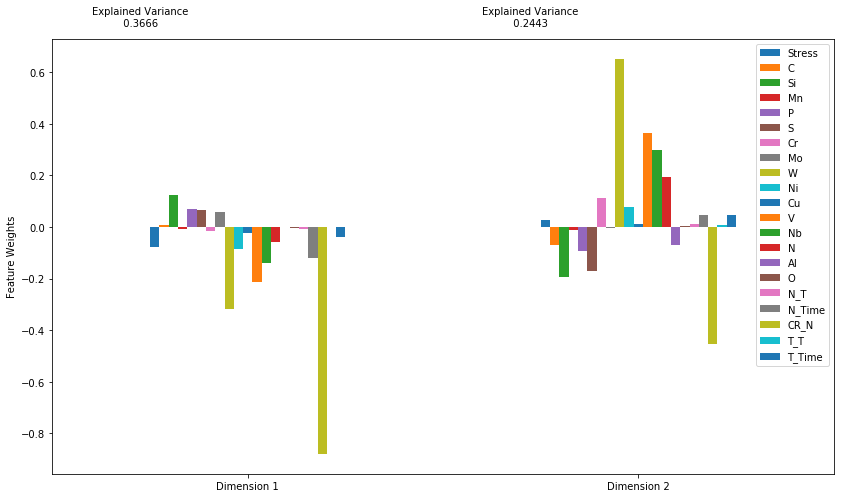

In [68]:
# Apply PCA by fitting the good data with the same number of dimensions as features
import visuals as vs
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(log_features)


# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(log_features, pca)
print pca

In [48]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(log_features)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(log_features)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [49]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.2656,1.2213
1,0.8641,-1.1628
2,4.4220,0.4966


In [50]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score


for i in range(2,12):
    print"Number of clusters: ", i
    clusterer = GMM(random_state=0, n_components=i)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print"Silhouette score: ", score

Number of clusters:  2
Silhouette score:  0.603627890004
Number of clusters:  3


/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multiv

Silhouette score:  0.688492412149
Number of clusters:  4
Silhouette score:  0.723972206658
Number of clusters:  5


/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multiv

Silhouette score:  0.66055189548
Number of clusters:  6
Silhouette score:  0.627011864372
Number of clusters:  7


/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWa

/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; T

Silhouette score:  0.606370318675
Number of clusters:  8


/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_

Silhouette score:  0.598662098002
Number of clusters:  9
Silhouette score:  

/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWa

0.584758883101
Number of clusters:  10
Silhouette score:  0.565260725143
Number of clusters:  11
Silhouette score:  0.568943076292


/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWa

/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multiv

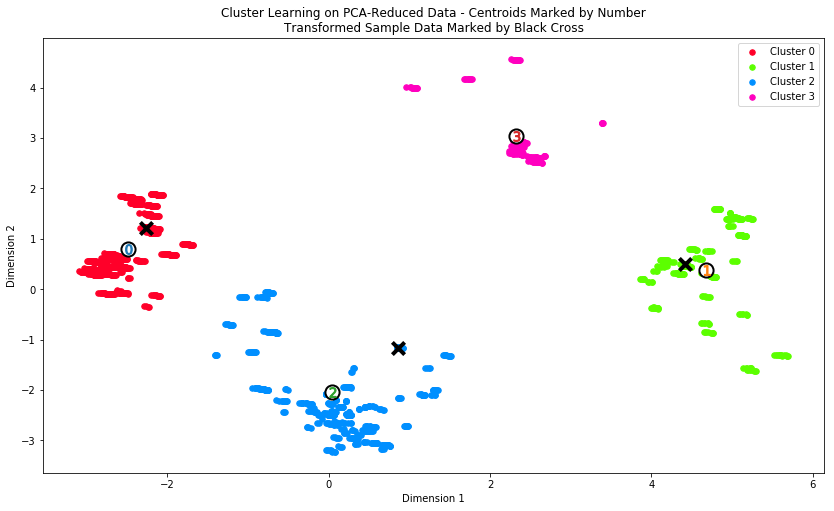

In [51]:
clusterer = GMM(random_state=0, n_components=4)
clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
    # TODO: Find the cluster centers
centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [73]:
# Import  
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'LMP' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(log_features, LMP, test_size = 0.2, random_state = 1)

# Split the 'features' and 'life' data into training and testing sets
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(log_features_T, log_life, test_size = 0.2, random_state = 1)

#X_train = np.array(X_train)
#y_train = np.asarray(y_train, dtype="|S6")

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])
#print "Training set has {} samples.".format(y_train.shape[0])
#print "Testing set has {} samples.".format(y_test.shape[0])
#display(X_train[:10])

Training set has 1652 samples.
Testing set has 414 samples.


Automatically created module for IPython interactive environment
('Coefficients: \n', array([-3413.4004513 ,   119.93696619,  -196.68491044,   -56.96872853,
        -254.95845797,   195.89716558,   400.50877355,   380.61931574,
         201.77549349,   -12.29710255,   -61.02265341,   260.95358684,
         255.35312228,  -103.70583242,   -66.99610708,  -267.22077723,
        7058.52895093,   338.45016696,   -36.59972825, -3362.37066068,
        -405.67967871]))
Mean squared error: 431558.69
Variance score: 0.92


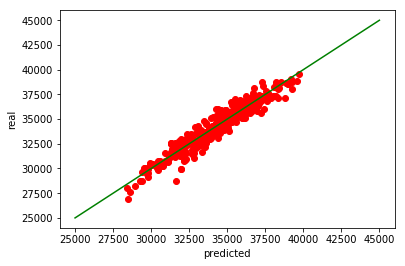

Mean squared error of life: 1.48
Variance score of life: 0.69


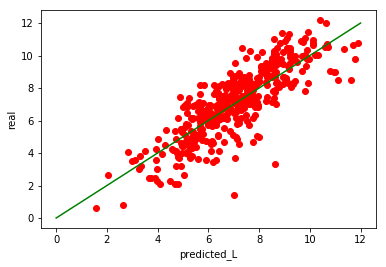

Average score for 5-fold cross-validation with linear regression
0.678936664668
0.211169283448
Average score for 30-fold cross-validation with linear regression
0.834626582924
0.081253198891
Average score for 80-fold cross-validation with linear regression
0.813789590295
0.192406579378


In [104]:
# Linear Regression

print(__doc__)



from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pylab as pl




# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


# Plot outputs
%matplotlib inline
pl.plot(y_pred, y_test,'ro')
pl.plot([25000,45000],[25000,45000], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()



# Train the model using the training sets
regr.fit(X_train_L, y_train_L)

# Make predictions using the testing set
y_pred_L = regr.predict(X_test_L)


print("Mean squared error of life: %.2f"
      % mean_squared_error(y_test_L, y_pred_L))
# Explained variance score: 1 is perfect prediction
print('Variance score of life: %.2f' % r2_score(y_test_L, y_pred_L))

# Plot outputs
%matplotlib inline
pl.plot(y_pred_L, y_test_L,'ro')
pl.plot([0,12],[0,12], 'g-')
pl.xlabel('predicted_L')
pl.ylabel('real')
pl.show()

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(regr, log_features, LMP, cv=5, scoring='r2')
print('Average score for 5-fold cross-validation with linear regression')
print(scores.mean())
print(scores.std())


scores = cross_val_score(regr, log_features, LMP, cv=30, scoring='r2')
print('Average score for 30-fold cross-validation with linear regression')
print(scores.mean())
print(scores.std())

scores = cross_val_score(regr, log_features, LMP, cv=80, scoring='r2')
print('Average score for 80-fold cross-validation with linear regression')
print(scores.mean())
print(scores.std())


/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Mean squared error: 564970.87
Variance score: 0.89


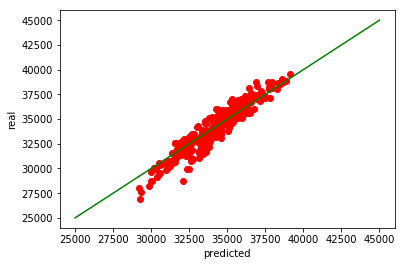

Average score for 5-fold cross-validation with SGD regression
0.765392046095
0.0387002452182
Average score for 30-fold cross-validation with SGD regression
0.806848075477
0.0971640897587
Average score for 80-fold cross-validation with SGD regression
0.78157739151
0.201064833031


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

scaler.fit(log_features)
log_features_s = scaler.transform(log_features)

sgdreg = linear_model.SGDRegressor(penalty='l2', alpha=0.15, n_iter=200)

# Compute RMSE on training data
sgdreg.fit(X_train_s,y_train)
y_pred = sgdreg.predict(X_test_s)


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


# Plot outputs
%matplotlib inline
pl.plot(y_pred, y_test,'ro')
pl.plot([25000,45000],[25000,45000], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

scores = cross_val_score(sgdreg, log_features_s, LMP, cv=5, scoring='r2')
print('Average score for 5-fold cross-validation with SGD regression')
print(scores.mean())
print(scores.std())


scores = cross_val_score(sgdreg, log_features_s, LMP, cv=30, scoring='r2')
print('Average score for 30-fold cross-validation with SGD regression')
print(scores.mean())
print(scores.std())

scores = cross_val_score(sgdreg, log_features_s, LMP, cv=80, scoring='r2')
print('Average score for 80-fold cross-validation with SGD regression')
print(scores.mean())
print(scores.std())

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a Random Forest regressor object
    regressor = RandomForestRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 30
    params = {'max_depth':range(1,30)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


# Fit the training data to the model using grid search
rfreg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(rfreg.get_params()['max_depth'])

/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Parameter 'max_depth' is 10 for the optimal model.


Mean squared error: 204642.25
Variance score: 0.96


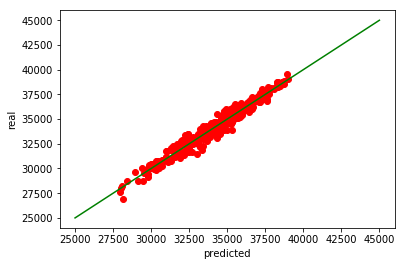

Average score for 5-fold cross-validation with Random Forest regression
0.796810161481
0.0833533699537
Average score for 30-fold cross-validation with Random Forest regression
0.85342548462
0.130162730771
Average score for 80-fold cross-validation with Random Forest regression
0.86830103939
0.165511537009


In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


rfreg = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=2)

#rfreg = GridSearchCV(RandomForestRegressor(random_state=0,max_depth=10), cv=5,param_grid={"": [10],"n_estimators": [1,2,3,4,5,6,7,8,9,10]})

rfreg.fit(X_train, y_train)

y_pred = rfreg.predict(X_test)


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


# Plot outputs
%matplotlib inline
pl.plot(y_pred, y_test,'ro')
pl.plot([25000,45000],[25000,45000], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()


#print(rfreg.feature_importances_)



scores = cross_val_score(rfreg, log_features, LMP, cv=5, scoring='r2')


print('Average score for 5-fold cross-validation with Random Forest regression')
print(scores.mean())
print(scores.std())

scores = cross_val_score(rfreg, log_features, LMP, cv=30, scoring='r2')

print('Average score for 30-fold cross-validation with Random Forest regression')
print(scores.mean())
print(scores.std())

scores = cross_val_score(rfreg, log_features, LMP, cv=80, scoring='r2')

print('Average score for 80-fold cross-validation with Random Forest regression')
print(scores.mean())
print(scores.std())

/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


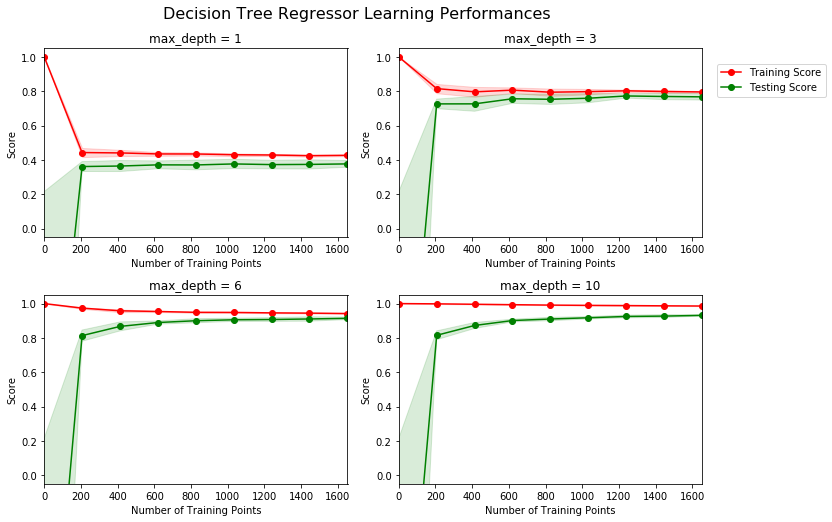

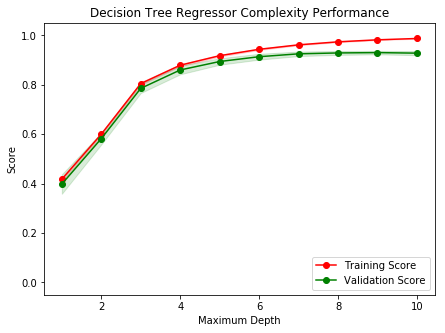

In [18]:
import visuals2 as vs

vs.ModelLearning(log_features, LMP)

vs.ModelComplexity(X_train, y_train)

In [100]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Parameter 'max_depth' is 8 for the optimal model.
Mean squared error: 312764.97
Variance score: 0.94


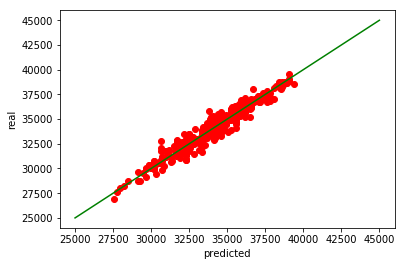

Average score for 5-fold cross-validation with Decision Tree regression
0.722499150172
0.0950545504967
Average score for 30-fold cross-validation with Decision Tree regression
0.746397780047
0.252788176557
Average score for 80-fold cross-validation with Decision Tree regression
0.548517320736
2.48823065137


In [101]:


# Fit the training data to the model using grid search
treereg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(treereg.get_params()['max_depth'])

treg = DecisionTreeRegressor(max_depth=9, random_state=1)
treg.fit(X_train, y_train)




y_pred = treg.predict(X_test)


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


# Plot outputs
%matplotlib inline
pl.plot(y_pred, y_test,'ro')
pl.plot([25000,45000],[25000,45000], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

scores = cross_val_score(treereg, log_features, LMP, cv=5, scoring='r2')
print('Average score for 5-fold cross-validation with Decision Tree regression')
print(scores.mean())
print(scores.std())

scores = cross_val_score(treereg, log_features, LMP, cv=30, scoring='r2')
print('Average score for 30-fold cross-validation with Decision Tree regression')
print(scores.mean())
print(scores.std())

scores = cross_val_score(treereg, log_features, LMP, cv=80, scoring='r2')
print('Average score for 80-fold cross-validation with Decision Tree regression')
print(scores.mean())
print(scores.std())

/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mean squared error: 1549586.45
Variance score: 0.70


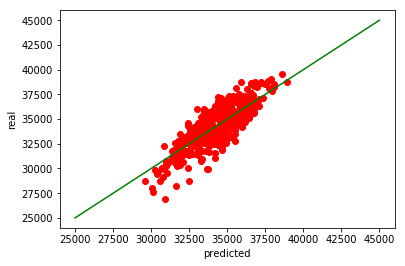

Average score for 5-fold cross-validation with MLP regression
0.516039679494
0.202108211517
Average score for 30-fold cross-validation with MLP regression
0.552374351387
0.311004184852
Average score for 80-fold cross-validation with MLP regression
0.516039679494
0.202108211517


In [102]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

MLPreg = MLPRegressor(hidden_layer_sizes=(20,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)

MLPreg = MLPreg.fit(X_train, y_train)

y_pred = MLPreg.predict(X_test)


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


# Plot outputs
%matplotlib inline
pl.plot(y_pred, y_test,'ro')
pl.plot([25000,45000],[25000,45000], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

scores = cross_val_score(MLPreg, features, LMP, cv=5, scoring='r2')
print('Average score for 5-fold cross-validation with MLP regression')
print(scores.mean())
print(scores.std())

scores = cross_val_score(MLPreg, features, LMP, cv=30, scoring='r2')
print('Average score for 30-fold cross-validation with MLP regression')
print(scores.mean())
print(scores.std())

scores = cross_val_score(MLPreg, features, LMP, cv=5, scoring='r2')
print('Average score for 80-fold cross-validation with MLP regression')
print(scores.mean())
print(scores.std())

Mean squared error: 218826.97
Variance score: 0.96


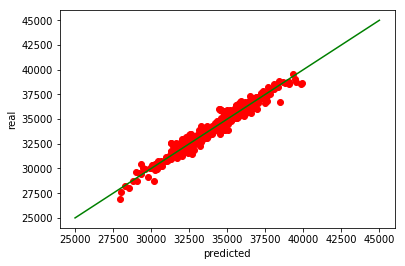

Average score for 5-fold cross-validation with SVR
0.598718514136
0.351478322567
Average score for 30-fold cross-validation with SVR
0.598718514136
0.351478322567
Average score for 80-fold cross-validation with SVR
0.598718514136
0.351478322567


In [103]:
#from __future__ import division
#import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


# #############################################################################
# Fit regression model
svr = GridSearchCV(SVR(kernel='poly', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1,1e2]})



#t0 = time.time()
svr.fit(X_train, y_train)
#svr_fit = time.time() - t0
#print("SVR complexity and bandwidth selected and model fitted in %.3f s"
#      % svr_fit)

#print "Parameter is {} for the optimal model.".format(svr.get_params())
y_pred = svr.predict(X_test)


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


# Plot outputs
%matplotlib inline
pl.plot(y_pred, y_test,'ro')
pl.plot([25000,45000],[25000,45000], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()



scores = cross_val_score(svr, log_features, LMP, cv=5, scoring='r2')
print('Average score for 5-fold cross-validation with SVR')
print(scores.mean())
print(scores.std())

scores = cross_val_score(svr, log_features, LMP, cv=5, scoring='r2')
print('Average score for 30-fold cross-validation with SVR')
print(scores.mean())
print(scores.std())

scores = cross_val_score(svr, log_features, LMP, cv=5, scoring='r2')
print('Average score for 80-fold cross-validation with SVR')
print(scores.mean())
print(scores.std())